In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../uscode')

In [16]:
from uscode import USCode
from citation_network import CitationNetwork
from search import SearchEngine

In [42]:
def id_to_location(elem_id):
    return tuple(div[1:] for div in elem_id.split('/'))

def location_info(sec_id):
    return "Title {:3} Section {:5} ".format(*id_to_location(sec_id))

In [18]:
usc = USCode.from_json('../data/usc20191009.json')
print(len(usc.titles))

56


In [19]:
cn = CitationNetwork(usc)
print(len(cn.nodes))

1767


In [20]:
print("Nodes", len(cn.nodes))
print("Edges", len(cn.edges))
total_weight = sum(w for _, _, w in cn.edges.data('weight'))
print("Weight", total_weight)

Nodes 1767
Edges 2401
Weight 3390


In [43]:
sorted_indeg = sorted(cn.nodes, key=lambda x: cn.in_degree(x), reverse=True)
sorted_outdeg = sorted(cn.nodes, key=lambda x: cn.out_degree(x), reverse=True)

def show_node_info(node):
    print(location_info(node),
          "In: {:>3}".format(cn.in_degree(node)),
          "Out: {:>3}".format(cn.out_degree(node)))

print("Highest Indegree:")
for node in sorted_indeg[:5]:
    show_node_info(node)

print("\nHighest Outdegree:")
for node in sorted_outdeg[:5]:
    show_node_info(node)

Highest Indegree:
Title 29  Section 3101   In:  92 Out:  12
Title 11  Section 101    In:  36 Out:   0
Title 52  Section 30101  In:  31 Out:  22
Title 29  Section 3141   In:  29 Out:  21
Title 8   Section 1551   In:  20 Out:   0

Highest Outdegree:
Title 29  Section 3102   In:   8 Out:  39
Title 29  Section 3174   In:  13 Out:  34
Title 19  Section 4301   In:   6 Out:  33
Title 29  Section 3151   In:  10 Out:  30
Title 31  Section 9705   In:   1 Out:  23


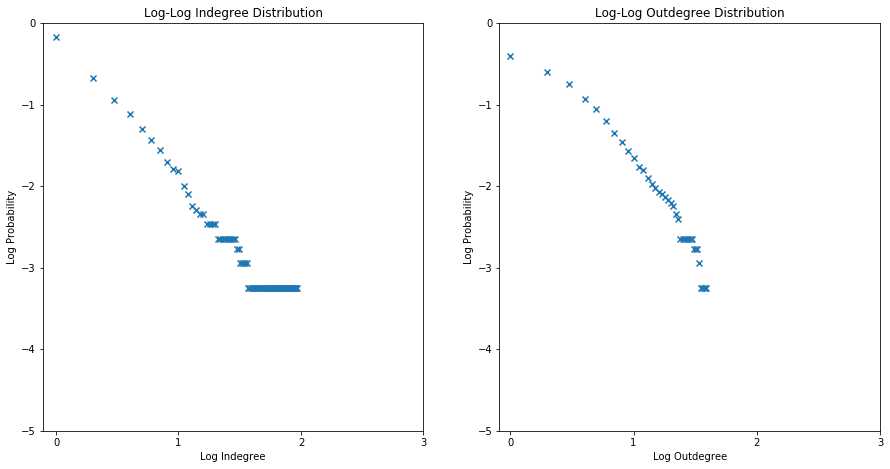

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.arange(1000, -1, -1)
y_indeg, y_outdeg = [], []

i1 = i2 = 0
for x in x_range:
    while i1 < len(sorted_indeg) and cn.in_degree(sorted_indeg[i1]) >= x:
        i1 += 1
    y_indeg.append(i1)
    
    while i2 < len(sorted_outdeg) and cn.out_degree(sorted_outdeg[i2]) >= x:
        i2 += 1
    y_outdeg.append(i2)
  
with np.errstate(divide='ignore'):
    x_range = np.log10(x_range)
    y_indeg = np.log10(np.array(y_indeg) / len(cn.nodes))
    y_outdeg = np.log10(np.array(y_outdeg) / len(cn.nodes))

fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))
for ax, y_range, name in zip(axs, [y_indeg, y_outdeg], ["Indegree", "Outdegree"]):
    ax.scatter(x_range, y_range, marker='x')
    
    
    ax.set_title("Log-Log {} Distribution".format(name))
    ax.set_xlabel("Log {}".format(name))
    ax.set_ylabel("Log Probability")
    ax.set_xticks(range(4))
    ax.set_yticks(range(-5, 1))

In [45]:
se = SearchEngine(usc, network=cn)

In [46]:
def show_top_5(results):
    for res in results[:5]:
        print(location_info(res.result.id),
              "Occurrence: {:3} ".format(res.occurrence),
              "Indegree: {:3} ".format(cn.in_degree(res.result.id)),
              "PageRank: {:.2E} ".format(se.pagerank[res.result.id]))
        
results = se.search('copyright', mode='fulltext')

se.rank(results, signal='occurrence')
print("Top 5 by Occurrence:")
show_top_5(results)

se.rank(results, signal='indegree')
print("\nTop 5 by Indegree:")
show_top_5(results)

se.rank(results, signal='pagerank')
print("\nTop 5 by PageRank:")
show_top_5(results)

Top 5 by Occurrence:
Title 17  Section 1401   Occurrence:  31  Indegree:   0  PageRank: 3.74E-04 
Title 19  Section 4343   Occurrence:   6  Indegree:   0  PageRank: 3.74E-04 
Title 19  Section 4342   Occurrence:   2  Indegree:   0  PageRank: 3.74E-04 
Title 45  Section 1303   Occurrence:   1  Indegree:   0  PageRank: 3.74E-04 
Title 19  Section 4341   Occurrence:   1  Indegree:   0  PageRank: 3.74E-04 

Top 5 by Indegree:
Title 17  Section 1401   Occurrence:  31  Indegree:   0  PageRank: 3.74E-04 
Title 19  Section 4343   Occurrence:   6  Indegree:   0  PageRank: 3.74E-04 
Title 19  Section 4342   Occurrence:   2  Indegree:   0  PageRank: 3.74E-04 
Title 45  Section 1303   Occurrence:   1  Indegree:   0  PageRank: 3.74E-04 
Title 19  Section 4341   Occurrence:   1  Indegree:   0  PageRank: 3.74E-04 

Top 5 by PageRank:
Title 17  Section 1401   Occurrence:  31  Indegree:   0  PageRank: 3.74E-04 
Title 19  Section 4343   Occurrence:   6  Indegree:   0  PageRank: 3.74E-04 
Title 19  Secti

In [47]:
def show_top_5(results):
    for res in results[:5]:
        print(location_info(res.result.id),
              "Occurrence: {:3} ".format(res.occurrence),
              "Indegree: {:3} ".format(cn.in_degree(res.result.id)),
              "PageRank: {:.2E} ".format(se.pagerank[res.result.id]))
        
results = se.search('(copyright OR property) AND NOT legal', mode='boolean')

se.rank(results, signal='occurrence')
print("Top 5 by Occurrence:")
show_top_5(results)

se.rank(results, signal='indegree')
print("\nTop 5 by Indegree:")
show_top_5(results)

se.rank(results, signal='pagerank')
print("\nTop 5 by PageRank:")
show_top_5(results)

Top 5 by Occurrence:
Title 31  Section 9705   Occurrence:  40  Indegree:   1  PageRank: 4.72E-04 
Title 19  Section 4344   Occurrence:  19  Indegree:   1  PageRank: 6.93E-04 
Title 19  Section 4349   Occurrence:  14  Indegree:   0  PageRank: 3.74E-04 
Title 14  Section 5105   Occurrence:  14  Indegree:   0  PageRank: 3.74E-04 
Title 36  Section 300108  Occurrence:  13  Indegree:   0  PageRank: 3.74E-04 

Top 5 by Indegree:
Title 29  Section 3151   Occurrence:   2  Indegree:  10  PageRank: 1.08E-03 
Title 19  Section 4322   Occurrence:   1  Indegree:   5  PageRank: 1.04E-03 
Title 4   Section 141    Occurrence:   1  Indegree:   5  PageRank: 1.42E-03 
Title 37  Section 1007   Occurrence:   2  Indegree:   4  PageRank: 7.73E-04 
Title 29  Section 3249   Occurrence:   2  Indegree:   4  PageRank: 1.04E-03 

Top 5 by PageRank:
Title 4   Section 141    Occurrence:   1  Indegree:   5  PageRank: 1.42E-03 
Title 6   Section 1503   Occurrence:   3  Indegree:   3  PageRank: 1.22E-03 
Title 29  Sect